In [54]:
import pandas as pd
import sklearn as skl
import numpy as np

In [55]:
###############      Data mining     ############### 

In [56]:
path1 = "/home/alejo/Desktop/DATASETS/Deep-NLP_Dataset/Sheet_1.csv"
path2 = "/home/alejo/Desktop/DATASETS/Deep-NLP_Dataset/Sheet_2.csv"

In [57]:
df1 = pd.read_csv(path1,encoding = "ISO-8859-1")
df2 = pd.read_csv(path2,encoding = "ISO-8859-1")

In [58]:
df1.describe()

,Unnamed: 4,Unnamed: 6
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [59]:
df1.head(3)

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   response_id    80 non-null     object 
 1   class          80 non-null     object 
 2   response_text  80 non-null     object 
 3   Unnamed: 3     2 non-null      object 
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     1 non-null      object 
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 5.1+ KB


In [61]:
df1["class"].unique()

array(['not_flagged', 'flagged'], dtype=object)

In [62]:
df1["Unnamed: 3"].unique()

array([nan, ' ',
       ' because so many people come to me with their problems. All I do is listen'],
      dtype=object)

In [63]:
df1.dropna(axis=1, how="all")

,response_id,class,response_text,Unnamed: 3,Unnamed: 5,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN
...,...,...,...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no...",NaN,NaN,NaN
76,response_77,flagged,when my best friends mom past away from od'ing...,NaN,NaN,NaN
77,response_78,not_flagged,As a camp counselor I provide stability in kid...,NaN,NaN,NaN
78,response_79,flagged,My now girlfriend used to have serious addicti...,NaN,NaN,NaN


In [64]:
df1["Unnamed: 5"].unique()

array([nan, '  '], dtype=object)

In [65]:
df1.replace([" ", "  "], np.nan, inplace=True)
df1.dropna(axis=1, how="all",inplace=True)

In [66]:
df2.replace([" ", "  "], np.nan, inplace=True)
df2.dropna(axis=1, how="all",inplace=True)

In [67]:
df1.head(3)

,response_id,class,response_text,Unnamed: 3
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN


In [68]:
df2.tail(3)

,resume_id,class,resume_text
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...
124,resume_125,not_flagged,\rResearch and Development Scientist - Burling...


In [69]:
df1["Unnamed: 3"].value_counts()

 because so many people come to me with their problems. All I do is listen    1
Name: Unnamed: 3, dtype: int64

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   response_id    80 non-null     object
 1   class          80 non-null     object
 2   response_text  80 non-null     object
 3   Unnamed: 3     1 non-null      object
dtypes: object(4)
memory usage: 2.6+ KB


In [71]:
df1.set_index(df1.columns.tolist()[0],inplace=True)
df2.set_index(df2.columns.tolist()[0],inplace=True)

In [72]:
df1.replace(np.nan, "nan", inplace=True)
filt = (df1["Unnamed: 3"] != "nan")

In [73]:
df1.rename(columns= {"Unnamed: 3": "col3"}, inplace=True)

In [74]:
df1["response_text"] = df1["response_text"].apply(lambda x : x if str(df1["col3"]).lower() == "nan" else x + ". Because so many people come to me with their problems. All I do is listen.")

In [75]:
df1.drop(columns = ["col3"], inplace=True)

In [76]:
###############    Checking what's in the dat with different tools        ###############

In [77]:
import spacy as sp

In [78]:
import os
os.system("python3 -m spacy download en_core_web_md")

0

In [79]:
# I don't know why (maybe the path where jupyter saves the models are not correct) 
# but "nlp = spacy.load("en_core_web_sm")" doesn't work well
import en_core_web_md
import en_core_web_sm
nlp = en_core_web_md.load()

In [80]:
# Let's play a bit with SpaCy to see what's inside
example = nlp(df1.loc["response_1","response_text"])

In [81]:
[(x,x.pos_ ,x.is_stop) for x in example]

[(I, 'PRON', True),
 (try, 'VERB', False),
 (and, 'CCONJ', True),
 (avoid, 'VERB', False),
 (this, 'DET', True),
 (sort, 'NOUN', False),
 (of, 'ADP', True),
 (conflict, 'NOUN', False),
 (., 'PUNCT', False),
 (Because, 'SCONJ', True),
 (so, 'ADV', True),
 (many, 'ADJ', True),
 (people, 'NOUN', False),
 (come, 'VERB', False),
 (to, 'ADP', True),
 (me, 'PRON', True),
 (with, 'ADP', True),
 (their, 'DET', True),
 (problems, 'NOUN', False),
 (., 'PUNCT', False),
 (All, 'DET', True),
 (I, 'PRON', True),
 (do, 'AUX', True),
 (is, 'AUX', True),
 (listen, 'VERB', False),
 (., 'PUNCT', False)]

In [82]:
from spacy import displacy
displacy.render(example)

In [83]:
examp_vect = nlp("Dog")

In [84]:
examp_vect.vector[0:10]

array([-0.40176 ,  0.37057 ,  0.021281, -0.34125 ,  0.049538,  0.2944  ,
       -0.17376 , -0.27982 ,  0.067622,  2.1693  ], dtype=float32)

In [85]:
len(examp_vect.vector)

300

In [86]:
#######################     WORDCLOUD    #########################

In [87]:
# Let's see the most common words 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [88]:
def wordcloud(serie):
    # These stop words come already with the library we could also extract them from serie
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in serie.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("bag_composition")

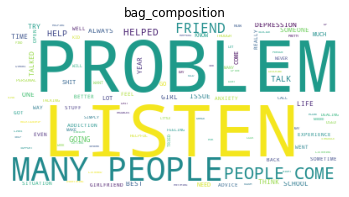

In [89]:
wordcloud(df1["response_text"])

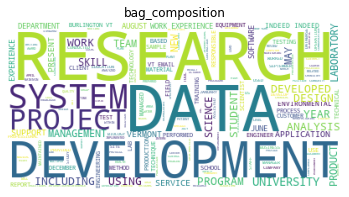

In [90]:
wordcloud(df2["resume_text"])

###  We split now into train and test sets

In [91]:
# The following lines are mainly to practice. This could be done faster with 
# from sklearn.cross_validation import train_test_split
# and from sklearn import preprocessing.LabelEncoder

In [92]:
from sklearn.utils import shuffle
df1 = shuffle(df1.replace("not_flagged", 0).replace("flagged", 1))
df2 = shuffle(df2.replace("not_flagged", 0).replace("flagged", 1))

In [93]:
class_gp_responses = df1.groupby(by = ["class"])
class_gp_resumes = df2.groupby(by = ["class"])

In [94]:
not_flagged_responses = class_gp_responses.get_group(0)
flagged_responses = class_gp_responses.get_group(1)
not_flagged_resumes = class_gp_resumes.get_group(0)
flagged_resumes = class_gp_resumes.get_group(1)

In [95]:
train_responses_not = not_flagged_responses.sample(frac = 0.8, axis=0)
train_responses_ = flagged_responses.sample(frac = 0.8, axis=0)
train_resumes_not = not_flagged_resumes.sample(frac = 0.8, axis=0)
train_resumes_ = flagged_resumes.sample(frac = 0.8, axis=0)
print(train_resumes_.shape)

(26, 2)


In [96]:
train_responses_not_list = train_responses_not.index.tolist()
train_responses__list  = train_responses_.index.tolist()
train_resumes_not_list  = train_resumes_not.index.tolist()
train_resumes__list  = train_resumes_.index.tolist()
#
filter1 = df1.index.isin(train_responses_not_list)
filter2 = df1.index.isin(train_responses__list)
filter3 = df2.index.isin(train_resumes_not_list)
filter4 = df2.index.isin(train_resumes__list)
#
test_responses_not = df1.loc[~filter1]
test_responses_ = df1.loc[~filter2]
test_resumes_not = df2.loc[~filter3]
test_resumes_ = df2.loc[~filter4]

In [97]:
train_resumes = shuffle(pd.concat([train_resumes_not, train_resumes_]))
test_resumes = shuffle(pd.concat([test_resumes_not, test_resumes_]))

In [98]:
train_responses = shuffle(pd.concat([train_responses_not, train_responses_]))
test_responses = shuffle(pd.concat([test_responses_not, test_responses_]))

In [99]:
text = ["Since this is clearly a binary classification problem we could use many tools.","Logistic regression, SVM, Random forest, decission trees, Naive Bayes, or a more complicated approach given employing neural networks.","It 's remarkable that the amount of data is very small. We can transform the corpus of each example into a sequence of embedding vectores (word2vect pretrained in SpaCy gives 300 features per word) but we would get more features than examples and we would have to do a LTM NN since it is sequencial data.","We could also generate new data using N-grams, but it's no worthy.","The best option looks to be to try different easy classifiers from skl and by Cross Validation see which one is better."]
print(text)

['Since this is clearly a binary classification problem we could use many tools.', 'Logistic regression, SVM, Random forest, decission trees, Naive Bayes, or a more complicated approach given employing neural networks.', "It 's remarkable that the amount of data is very small. We can transform the corpus of each example into a sequence of embedding vectores (word2vect pretrained in SpaCy gives 300 features per word) but we would get more features than examples and we would have to do a LTM NN since it is sequencial data.", "We could also generate new data using N-grams, but it's no worthy.", 'The best option looks to be to try different easy classifiers from skl and by Cross Validation see which one is better.']


In [100]:
# To acelerate data mining I will not compute the TF-IDF or the vectorarization,
# but I will pick from skl

In [101]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [102]:
# We are going to use also the skl tools for corpus vectorization and tf-idf normalization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
Vect = CountVectorizer()
TF_IDF = TfidfVectorizer()

In [103]:
# Multinomial Bayes Naive for responses
X_train = Vect.fit_transform(train_responses["response_text"]) # get vocab and vectores
X_test = Vect.transform(test_responses["response_text"])
y = train_responses["class"].array
NB.fit(X = X_train,y = train_responses["class"].array)
predictions_NB_response = NB.predict(X_test)
Y_bar_responses = test_responses["class"]
metrics.accuracy_score(Y_bar_responses,predictions_NB_response)

0.8958333333333334

In [104]:
# Multinomial Bayes Naive for resumes
X_train_resume = Vect.fit_transform(train_resumes["resume_text"])
X_test_resume = Vect.transform(test_resumes["resume_text"])
NB.fit(X_train_resume, train_resumes["class"])
predictions_resume_NB = NB.predict(X_test_resume)
Y_bar_resumes = test_resumes["class"]
metrics.accuracy_score(Y_bar_resumes, predictions_resume_NB)

0.9066666666666666

In [105]:
# Random forest for responses
RF = RandomForestClassifier(max_depth=10,max_features=20)
RF.fit(X = X_train,y = train_responses["class"].array)
RF_responses_pred = RF.predict(X_test)
metrics.accuracy_score(Y_bar_responses, RF_responses_pred)

0.90625

In [106]:
# Random forest for resumes
RF = RandomForestClassifier(max_depth=15,max_features=30)
RF.fit(X_train_resume, train_resumes["class"])
RF_resumes_pred = RF.predict(X_test_resume)
metrics.accuracy_score(Y_bar_resumes, RF_resumes_pred)

0.9